In [1]:
# Run this cell to import the modules and set up some stuff
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

# Group 1 - Data Mining and Data Science project

## 1. Background

The organisation chosen for this project is a fictional movie production company in the film industry that is creating and directing new movies. The typical working process for the company is as follow. They choose a work, or an idea, and get the full rights to it. Then they put the crew together, consisting of writer, director and actors. When all this is done they reach out to investors to get the money needed to produce the film. Then they create the film and sell it to theatres and resellers.

In recent years, the company has not used any specific strategy for movie production. They have tried to guess what kind of movies people like and from that invested huge financial capital in the production. Then they have put the crew together without making any major analysis in advance. This strategy has only managed to produce a few successful movies, but the majority of all produced films are at a loss. The company has repeatedly tried to find a pattern for those movies that are profitable and sell well but has not succeeded yet. Eventually, they came to a point where they realised that their current strategy is not working well enough. If they continue as they do, they risk being bankrupt in the near future. Their next movie could be crucial for the company's survival.

One of the factors that may increase the chance of a movie to be successful is that it has high ratings on IMDb. Many film companies use IMDB to find best-selling movies, therefore, high rated movies have a greater chance of generating profits (Meenakshi et al., 2018). Therefore, the company's primary goal is to get the best possible rating on IMDb. 

## 2. Problem description

### 2.1 Problem description

The company has released several movies but none of them has been particularly successful. For their next movie, the aim is to make a bestseller, or at least more profitable, to get the company back on track again. This time they want to make an analysis of what factors they should take into account before starting the creation process of the movie. They want to find out what is most important to allocate their financial resources too, to optimise and improve the success rate of the film. This in turn to increases the monetary results of the film and reach their goal. 

It is difficult to say what aspects of a movie that are the most crucial factors of defining a movie as good (Oliver and Hartman, 2010). In addition to this, as Sharda and Delen (2006) explain that it is also very difficult to predict the demand for a movie in advance. Therefore this makes the movie business one of the riskiest endeavours for investors. There are even people claiming that it is not possible to predict how a movie is going to do in the marketplace (Sharda and Delen, 2006). As Jack Valenti, the former president of Motion Picture Association of America once said: “Excellence is a fragile substance and movie making is a collaboration of talent, which is why it is hard to make and buy great films.”  (Valenti, 1978). He is entitled that talent is required for making a good movie, as movies are subject to subjective judgment by the viewers(1978). However, with the help of new technologies and methods, it could be possible to “hack” the normal way of producing movies to increase the chances of being successful (1978).

This project will look into if it is possible to, through data mining, do an analysis of the data of movies available at IMDb. They are, the length of the movie, actors, writer and director. Then, based on these, see if there are any factors that can increase the chances of producing a highly rated movie. 

### 2.2 Research questions
	
Based on the above this report will answer the following question:

*What factors have the biggest impact on the success of a movie at IMDb?*

### 2.3 Hypothesis

To answer the question being asked, this research will look at factors that are believed to play a great role if the movie will get a high grade from the people watching it or not. The hypothesis is based on the data available through IMDb. The factors that will be analysed is the movie’s running time, the actors in it, the writer and the director.

#### Running time
It is not certain if previous researches have included a movie’s running time as a success factor for a movie. However, this could be interesting to look at. It is not impossible to think that the length has some impact on the viewers. Perhaps a too long movie will make the audience lose their concentration, or if it is too short they do not have time to fully get into the movie. 

#### Writers
The writers often, in comparison to actors and directors, tend to be quite anonymous in relation to their films. And as Batty (2015) describes, there is a lack of screen production research which means that this area may contain gaps. Nevertheless this is an interesting factor to look at in relation to the movie’s success rate, but in the end, we think that writers should not have any significant effect on our result.

#### Actors
When others have tried to analyse the factors to a movie’s success many of them have looked into the impact of the stars of the movie (Lee et. al, 2016). That is, the actors. Lee et. al (2014) are using a measurement of “star buzz” in their analysis of a successful movie. Since many other surveys of movies are using this as a factor, and even though it has shown a mixed result, it seems like a factor that should be considered. It is also not difficult to imagine that a movie with a popular actor with many fans gets high rated just because the actor is acting in it. 

#### Director
The director of the movie is likely to have an impact on the success rate. Parkeh and Biswas (2015) are analysing the factors that have the most impact on movies in certain genres. Their results show that in all of the six genres, the direction is one of the driving factors. Therefore this factor will be used in this report as well. The difference in this research is that the aim is to find the names of the directors that often create successful movies. 

## 3. Data collection

### 3.1 Data Collection

The data used for the analysis will be user rating data from IMDb. This data is free and can be obtained from IMDB (imdb.com, 2018) with its documentation available at https://www.imdb.com/interfaces/. The datasets contain complete user rating data from IMDb and in addition to the rating, it contains additional information about the movie titles and actors. The table about the directors and writers for every movie will be left out due to reducing the scope of the project. The information selected is considered relevant enough to get useful results for the movie company.

IMDb is used as the primary source for this project because of the following reasons: IMDb provides a large movie set that is open to all users, which has information related to movie ratings, movie genres, actors, directors and writers.
Movies on IMDb are exposed to a large number of people. At present, IMDb has about 83 million registered users (IMDb.com). IMDb does not have a complete dataset, it lacks information about movie budget, revenue other important factors. But the information available is considered sufficient for the purpose of this project.

### 3.2 Datasets/Tables

For the analysis four different datasets will be downloaded from IMDb, these are: “Title Basics”, “Title Ratings”, “Title Principals” and “Title Crew”. 

- “Title Basics” contains basic information related to the movie title and the columns that will be used from this table are “tconst”, “titleType”, “tvepisode”, “primaryTitle”, “startYear”, “runtimeMinutes” and “genres”.

In [2]:
title_basics = pd.read_csv(
    "https://datasets.imdbws.com/title.basics.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 'isAdult': int, 'startYear': str, 'endYear': str, 'runtimeMinutes': str, 'genres': str}
)

- “Title Ratings” contains the actual information about the ratings for each title and the columns that will be used for this table are “tconst”, “averageRating” and “numVotes”.

In [3]:
title_ratings = pd.read_csv(
    "https://datasets.imdbws.com/title.ratings.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'averageRating': float, 'numVotes': int}
)

- “Title Principals” contains information about the principal people related to every movie. The columns that will be used are “tconst”, “ordering”, “nconst” and “category”.

In [4]:
title_principals = pd.read_csv(
    "https://datasets.imdbws.com/title.principals.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'ordering': int, 'nconst': str, 'category': str, 'job': str, 'characters': str}
)

- “Title Crew” contains information about the writers and directors of a movie. The columns that will be used are “tconst”, “directors” and “writers”.

In [5]:
title_crew = pd.read_csv(
    "https://datasets.imdbws.com/title.crew.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'directors': str, 'writers': str}
)

### 3.3 Data dictionary

- `tconst` - Alphanumeric unique identifier of the title
- `primaryTitle` - The more popular title / the title used by the filmmakers on promotional materials at the point of release
- `startYear` - Represents the release year of a title
- `genre` - The first genre associated with the title
- `averageRating` - Weighted average of all the individual user ratings
- `numVotes` - Number of votes the title has received
- `success` - Whether the movie is successful or not (0 = No, 1 = Yes)
- `actor1` - Name of the first actor in the ordering of a given title
- `actor2` - Name of the second actor in the ordering of a given title
- `director` - Name of the first director in the ordering of a given title
- `writer` - Name of the writer in the ordering of a given title
- `runtimeMinutes` - Total minutes of the movie’s runtime

### 3.3 Preprocessing

#### 3.3.1 Initial filtering

Since the datasets are very big, an initial filtering needs to be done to sort out information that is irrelevant. Since the movie company wants to create a modern movie, movies made before 2000 will be left out. We made an assessment not to include movies with less than 1000 votes to give a fair review. This will create a new dataset that still contains a lot but still relevant information to use and much easier to handle. We are also adding an additional attribute, called "successful". Finally, we remove all null values.

First we only keep the relevant columns:

In [6]:
title_basics = title_basics[['tconst', 'titleType', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_principals = title_principals[['tconst', 'ordering', 'nconst', 'category']]

We filter out only the movies from the year 2000 and until 2017 and keep them:

In [7]:
title_basics_filtered = title_basics[title_basics.titleType == "movie"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear >= "2000"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear <= "2017"]
title_basics_filtered = title_basics_filtered[['tconst', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_basics_filtered.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
34822,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance"
65547,tt0066853,Na Boca da Noite,2016,68,Drama
86845,tt0088751,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi"
92819,tt0094859,Chief Zabu,2016,74,Comedy
93991,tt0096056,Crime and Punishment,2002,126,Drama


We filter out all ratings with at least 1000 votes:

In [8]:
title_ratings_filtered = title_ratings[title_ratings['numVotes'] >= 1000]
title_ratings_filtered.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1440
2,tt0000003,6.6,1041
4,tt0000005,6.2,1737
7,tt0000008,5.6,1539
9,tt0000010,6.9,5133


In [9]:
movies_ratings = pd.merge(title_basics_filtered, title_ratings_filtered, on='tconst')
movies_ratings.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423


In [10]:
movies_ratings_crew = pd.merge(movies_ratings, title_crew, on='tconst')
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,"nm0737216,nm0003506"
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,"nm0921985,nm0486824"
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277


Adding an attribute for whether the movie is successful. A movie is considered to be successful if the average rating is 7.0 or above. This because the top 250 movies on IMDb have the rating of 8.0 and therefore we decided that 7.0 was a good limit. 

1 means that the movie is successful and 0 means that it is not.

In [11]:
movies_ratings_crew['successful'] = np.where(movies_ratings_crew['averageRating'] >= 7.0, 1, 0)
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,"nm0737216,nm0003506",0
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,"nm0921985,nm0486824",0
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1


Number of successful movies:

In [12]:
movies_ratings_crew.successful.value_counts()

0    10733
1     4770
Name: successful, dtype: int64

Delete movies without a runtime:

In [13]:
for i, row in movies_ratings_crew.iterrows():
    if movies_ratings_crew.at[i,'runtimeMinutes'] == r"\N" or movies_ratings_crew.at[i,'runtimeMinutes'] == r"\\N":
        movies_ratings_crew.at[i,'runtimeMinutes'] = None

movies_ratings_crew = movies_ratings_crew.dropna(subset=['runtimeMinutes'])

movies_ratings_crew['runtimeMinutes'] = movies_ratings_crew['runtimeMinutes'].astype(int)
movies_ratings_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15454 entries, 0 to 15502
Data columns (total 10 columns):
tconst            15454 non-null object
primaryTitle      15454 non-null object
startYear         15454 non-null object
runtimeMinutes    15454 non-null int32
genres            15454 non-null object
averageRating     15454 non-null float64
numVotes          15454 non-null int32
directors         15454 non-null object
writers           15454 non-null object
successful        15454 non-null int32
dtypes: float64(1), int32(3), object(6)
memory usage: 1.1+ MB


Get only the first director, writer and genre:

In [14]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'directors'] = movies_ratings_crew.at[i,'directors'].split(',')[0]

In [15]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'writers'] = movies_ratings_crew.at[i,'writers'].split(',')[0]

In [16]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'genres'] = movies_ratings_crew.at[i,'genres'].split(',')[0]

In [17]:
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72509,nm0003506,nm0737216,0
1,tt0118589,Glitter,2001,104,Drama,2.2,20534,nm0193554,nm0921985,0
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1532,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100956,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1


Most movies have multiple actors, to make everything manageable, we have assumed an average where we chose to have two actors in our desicion tree.

Get the top 2 actors for each movie:

In [18]:
#Get actor 1
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 1]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]

movies_ratings_crew_actors = pd.merge(movies_ratings_crew, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor1'})
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72509,nm0003506,nm0737216,0,nm0000212
1,tt0118589,Glitter,2001,104,Drama,2.2,20534,nm0193554,nm0921985,0,nm0001014
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1532,nm0440948,nm0551138,0,nm0427470
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100956,nm0939182,nm0939182,1,nm0504897
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199


In [19]:
#Get actor 2
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 2]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]

movies_ratings_crew_actors = pd.merge(movies_ratings_crew_actors, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor2'})
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72509,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,Drama,2.2,20534,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1532,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583


Delete movies without directors or writers (null values):

In [20]:
movies_ratings_crew_actors['directors'] = movies_ratings_crew_actors['directors'].replace(r'\N', np.nan)
movies_ratings_crew_actors = movies_ratings_crew_actors.dropna(axis=0, subset=['directors'])

movies_ratings_crew_actors['writers'] = movies_ratings_crew_actors['writers'].replace(r'\N', np.nan)
movies_ratings_crew_actors = movies_ratings_crew_actors.dropna(axis=0, subset=['writers'])

movies_ratings_crew_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14395 entries, 0 to 14484
Data columns (total 12 columns):
tconst            14395 non-null object
primaryTitle      14395 non-null object
startYear         14395 non-null object
runtimeMinutes    14395 non-null int32
genres            14395 non-null object
averageRating     14395 non-null float64
numVotes          14395 non-null int32
directors         14395 non-null object
writers           14395 non-null object
successful        14395 non-null int32
actor1            14395 non-null object
actor2            14395 non-null object
dtypes: float64(1), int32(3), object(8)
memory usage: 1.3+ MB


Creates a table of successful movies:

In [22]:
successful_movies = movies_ratings_crew_actors[movies_ratings_crew_actors.successful == 1]
successful_movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583
5,tt0118926,The Dancer Upstairs,2002,132,Crime,7.0,6013,nm0000518,nm0787649,1,nm0000849,nm0603090
9,tt0120263,Songs from the Second Floor,2000,98,Comedy,7.7,15188,nm0027815,nm0027815,1,nm0635070,nm0489281
11,tt0120626,April Captains,2000,123,Drama,7.1,2630,nm0210218,nm0210218,1,nm0009629,nm0210218


## 4. Method and data analysis
### 4.1 Method

The method chosen for this analysis is classification and the technique used is the decision tree classifier. A decision tree is a methodology to reach a final conclusion by taking a complex decision and divide it into easier decisions (Safian, Landgrebe, 1991). By asking questions about the attributes, and then supplementary questions, in a hierarchical way, a decision or conclusion will finally be reached (Steinbach Kumar, 2014). A tree has three types of nodes, root node, internal nodes and leafs (2014). When asking questions and receiving answers a path will follow the nodes until a leaf is reached and that is where the final decision or conclusion is being made (2014).

This technique will enable the possibilities to do a prediction if a movie will get a high rating or not by asking questions and following the nodes to see whether the movie fulfils all the criteria to become a highly rated movie. 

### 4.2 Analysis
#### Actors

In this section the actors will be rated based on the number of successful movies they have participated in and their total number of movies.

Counts all actors that participated in at least one of the movies:

In [21]:
actors = pd.concat([movies_ratings_crew_actors['actor1'], movies_ratings_crew_actors['actor2']])
actors = actors.value_counts().reset_index()
actors.columns = ['actors', 'movies']
actors.head()

,actors,movies
0,nm0474774,64
1,nm0000821,47
2,nm0000115,44
3,nm0222426,41
4,nm0000168,39


Creates a table of successful actors and merge with all the actors. Also fills null values with 0:

In [23]:
successful_actors = pd.concat([successful_movies['actor1'], successful_movies['actor2']])
successful_actors = successful_actors.value_counts().reset_index()
successful_actors.columns = ['actors', 'successfulMovies']
actors = pd.merge(actors, successful_actors, on='actors', how='outer')
actors.fillna(value=0, inplace=True)

Calculating success rate for each actor (meaning number of successful movies devided by all movies):

In [24]:
for i, row in actors.iterrows():
    actors.at[i, 'successRate'] = actors.at[i, 'successfulMovies'] / actors.at[i, 'movies']
    
actors.sort_values(by='successRate', ascending=0)

,actors,movies,successfulMovies,successRate
6478,nm5531398,1,1.0,1.0
7742,nm1395024,1,1.0,1.0
7781,nm2063290,1,1.0,1.0
7779,nm1423812,1,1.0,1.0
7778,nm9300501,1,1.0,1.0
7775,nm0339730,1,1.0,1.0
7774,nm5496955,1,1.0,1.0
7767,nm4496842,1,1.0,1.0
7764,nm0464495,1,1.0,1.0
7762,nm0001295,1,1.0,1.0


We noticed alot of actors with only one movie and with a success rate of 100%:

In [25]:
actors[actors.movies == 1].successRate.value_counts()

0.0    6205
1.0    2642
Name: successRate, dtype: int64

We therefore only use actors with at least two movies:

In [26]:
actors = actors[actors.movies >= 2]
actors.sort_values(by='successRate', ascending=0)

,actors,movies,successfulMovies,successRate
1552,nm2281292,4,4.0,1.0
3541,nm0155203,2,2.0,1.0
2880,nm0478165,2,2.0,1.0
2882,nm4382111,2,2.0,1.0
3551,nm1399243,2,2.0,1.0
3549,nm1015631,2,2.0,1.0
3545,nm3640154,2,2.0,1.0
3544,nm2537099,2,2.0,1.0
3902,nm7371790,2,2.0,1.0
3905,nm0997115,2,2.0,1.0


We can now see that the number of actors with a success rate of 100% has decreased:

In [27]:
actors.successRate.value_counts().head(3)

0.0    1831
0.5     572
1.0     301
Name: successRate, dtype: int64

#### Directors

In this section the directors will be rated based on the number of successful movies they have directed and their total number of movies.

Counts all the directors in at least one of the movies:

In [28]:
directors = collections.Counter(movies_ratings_crew_actors["directors"]).most_common()
directors = pd.DataFrame(list(directors))
directors.columns = ["directors", "movies"]
directors.head()

,directors,movies
0,nm0586281,28
1,nm0093051,24
2,nm0001752,19
3,nm0000095,18
4,nm0698184,17


Creates a table of successful directors and merge with all the directors. Also fills null values with 0:

In [29]:
successful_directors = successful_movies['directors']
successful_directors = successful_directors.value_counts().reset_index()
successful_directors.columns = ['directors', 'successfulMovies']
directors = pd.merge(directors, successful_directors, on='directors', how='outer')
directors.fillna(value=0, inplace=True)

Calculating success rate for each director (meaning number of successful movies devided by all movies):

In [30]:
for i, row in directors.iterrows():
    directors.at[i, 'directorRate'] = directors.at[i, 'successfulMovies'] / directors.at[i, 'movies']

directors.sort_values(by='directorRate', ascending=0)

,directors,movies,successfulMovies,directorRate
7677,nm4940051,1,1.0,1.0
4595,nm1727100,1,1.0,1.0
4599,nm0687751,1,1.0,1.0
4600,nm2293201,1,1.0,1.0
4602,nm0552140,1,1.0,1.0
1343,nm0520488,3,3.0,1.0
4606,nm1827617,1,1.0,1.0
4631,nm2100558,1,1.0,1.0
4637,nm0897433,1,1.0,1.0
4647,nm2738713,1,1.0,1.0


We noticed that many directors only had one movie. This causes a bigger chance of a success rate of 100%:

In [31]:
directors[directors.movies == 1].directorRate.value_counts()

0.0    3686
1.0    1095
Name: directorRate, dtype: int64

We therefore only use directors with at least two movies:

In [32]:
directors = directors[directors.movies >= 2]
directors.sort_values(by='directorRate', ascending=0)

,directors,movies,successfulMovies,directorRate
1813,nm0001837,2,2.0,1.0
2144,nm1316072,2,2.0,1.0
480,nm1962313,5,5.0,1.0
2139,nm1431376,2,2.0,1.0
2137,nm2057169,2,2.0,1.0
1415,nm1327703,3,3.0,1.0
2136,nm1920049,2,2.0,1.0
1684,nm0434153,2,2.0,1.0
2581,nm3602074,2,2.0,1.0
486,nm0258732,5,5.0,1.0


We can now see that the number of directors with a success rate of 100% has decreased:

In [33]:
directors.directorRate.value_counts().head(3)

0.0    1463
0.5     418
1.0     296
Name: directorRate, dtype: int64

#### Writers

In this section the writers will be rated based on the number of successful movies they have directed and their total number of movies.

Counts all the writers in at least one of the movies:

In [34]:
writers = collections.Counter(movies_ratings_crew_actors["writers"]).most_common()
writers = pd.DataFrame(list(writers))
writers.columns = ["writers", "movies"]
writers.head()

,writers,movies
0,nm0000108,26
1,nm0000095,18
2,nm1347153,18
3,nm0421314,17
4,nm1104118,16


Creates a table of successful writers and merge with all the writers. Also fills null values with 0:

In [35]:
successful_writers = successful_movies['writers']
successful_writers = successful_writers.value_counts().reset_index()
successful_writers.columns = ['writers', 'successfulMovies']
writers = pd.merge(writers, successful_writers, on='writers', how='outer')
writers.fillna(value=0, inplace=True)

Calculating success rate for each writer (meaning number of successful movies devided by all movies):

In [36]:
for i, row in writers.iterrows():
    writers.at[i, 'writerRate'] = writers.at[i, 'successfulMovies'] / writers.at[i, 'movies']

writers.sort_values(by='writerRate', ascending=0)

,writers,movies,successfulMovies,writerRate
4777,nm0911085,1,1.0,1.0
4609,nm1525010,1,1.0,1.0
4490,nm0467569,1,1.0,1.0
4511,nm0293533,1,1.0,1.0
4513,nm0398596,1,1.0,1.0
4514,nm1303246,1,1.0,1.0
4515,nm0972040,1,1.0,1.0
4521,nm0113880,1,1.0,1.0
4523,nm1714819,1,1.0,1.0
4526,nm1987211,1,1.0,1.0


We noticed that many writers only had one movie. This causes a bigger chance of a success rate of 100%:

In [37]:
writers[writers.movies == 1].writerRate.value_counts()

0.0    5289
1.0    1718
Name: writerRate, dtype: int64

We therefore only use writers with at least two movies:

In [38]:
writers = writers[writers.movies >= 2]
writers.sort_values(by='writerRate', ascending=0)

,writers,movies,successfulMovies,writerRate
940,nm0161834,3,3.0,1.0
970,nm1862815,3,3.0,1.0
1201,nm0796504,2,2.0,1.0
1921,nm0026199,2,2.0,1.0
1203,nm0891554,2,2.0,1.0
1774,nm1223381,2,2.0,1.0
525,nm0027815,3,3.0,1.0
1204,nm0563748,2,2.0,1.0
273,nm4199426,5,5.0,1.0
1712,nm1048533,2,2.0,1.0


We can now see that the number of writers with a success rate of 100% has decreased:

In [39]:
writers.writerRate.value_counts().head(3)

0.0    1285
0.5     435
1.0     291
Name: writerRate, dtype: int64

#### Time

Plots out the runtime of the movie and compare it with the average rating to see if there's any relationship:

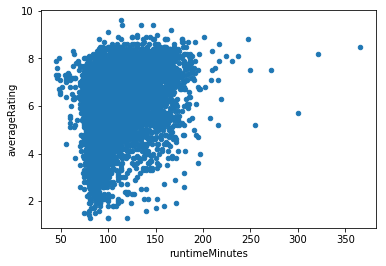

In [40]:
movies_ratings_crew_actors.plot.scatter(x='runtimeMinutes', y='averageRating')

The graph shows some relation between the movie’s runtime and the rating. It is possible to see that the movies with lower ratings (below 4) have a tendency to be under 100 minutes. However, the relationship seems to be very weak. 

#### Decision Tree

This is our table at the moment:

In [52]:
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72509,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,Drama,2.2,20534,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1532,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583


We merge the rate of all the actors, writers and directors and also calculate an average rate for the actors. After that we only keep the relevant columns:

In [53]:
df = pd.merge(movies_ratings_crew_actors, directors[['directors', 'directorRate']], on='directors')

df = pd.merge(df, writers[['writers', 'writerRate']], on='writers')

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor1', right_on='actors')
df = df.rename(columns={'successRate': 'actor1Rate'})

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor2', right_on='actors')
df = df.rename(columns={'successRate': 'actor2Rate'})

df['actorAvgRate'] = (df['actor1Rate'] + df['actor2Rate']) / 2

df = df[['runtimeMinutes', 'successful', 'directorRate', 'writerRate', 'actor1Rate', 'actor2Rate', 'actorAvgRate']]
df.head()

,runtimeMinutes,successful,directorRate,writerRate,actor1Rate,actor2Rate,actorAvgRate
0,118,0,0.571429,0.333333,0.000000,0.5,0.250000
1,96,0,0.277778,0.277778,0.277778,0.5,0.388889
2,134,1,0.714286,0.250000,0.375000,0.5,0.437500
3,104,0,0.111111,0.500000,0.375000,0.5,0.437500
4,130,1,1.000000,1.000000,0.714286,0.5,0.607143


Splits the data into a training and testing set:

In [54]:
successful_data = df.successful
X_train, X_test, y_train, y_test = train_test_split(df[['runtimeMinutes', 'directorRate', 'writerRate', 'actorAvgRate']], successful_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 3053 rows
Our test data has 1018 rows


In [55]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Compares the prediction with the correct answer:

In [56]:
sample = X_test.head(15)
sample['successful'] = classifier.predict(sample)
sample = sample.rename(columns={'successful': 'predictSuccessful'})
correct = pd.Series(y_test, name='correctSuccessful').head(15)
pd.concat([sample, correct], axis=1)

,runtimeMinutes,directorRate,writerRate,actorAvgRate,predictSuccessful,correctSuccessful
2555,93,0.166667,0.000000,0.000000,0,0
2021,95,0.000000,0.000000,0.093750,0,0
3743,94,0.500000,0.500000,0.000000,0,0
3880,97,0.250000,0.250000,0.625000,1,1
24,91,0.000000,0.000000,0.243333,0,0
607,88,0.500000,0.000000,0.086957,0,0
1986,103,0.333333,0.500000,0.450000,1,1
2017,103,0.000000,0.000000,0.055556,0,0
75,98,0.600000,0.333333,0.136957,0,0
3193,112,0.800000,0.500000,0.416667,1,1


In [57]:
#Optional code to point at Graphviz on remote desktop-computers:
!set PATH=PATH;C:/Program Files (x86)/Graphviz2.38/bin/
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [58]:
#Optional code to be able to export the decision tree:
"""
!pip install pydotplus
from io import StringIO
dotfile = StringIO()
"""

'\n!pip install pydotplus\nfrom io import StringIO\ndotfile = StringIO()\n'

#### Create the decision tree

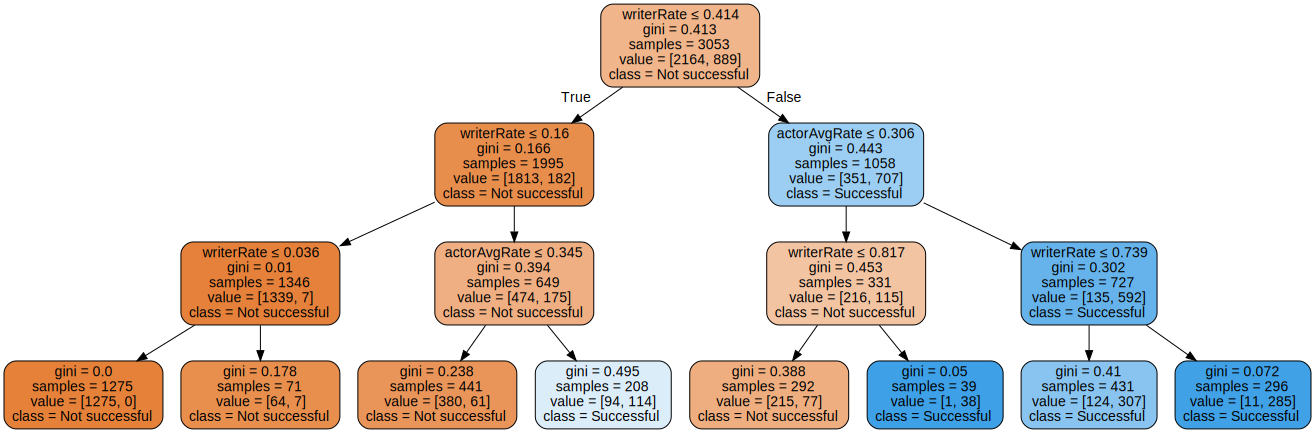

In [59]:
#Replace out_file=None below with out_file=dotfile to be able to export
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Not successful', 'Successful'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot

This decision tree shows that the attributes that have an impact on whether the movie is going to be classified as successful are writers and actors.

In [60]:
#Optional code to export the decision tree:
"""
import pydotplus
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")
"""

'\nimport pydotplus\ngraph = pydotplus.graph_from_dot_data(dotfile.getvalue())\ngraph.write_png("dtree.png")\n'

Calculates the accuracy score:

In [61]:
pred = classifier.predict(X_test)
true = y_test
accuracy_score(true, pred)

0.8605108055009824

As shown here, the accuracy score is around 0.80, that is, 80%. This indicates that the decision tree is doing a correct prediction on almost all of the movies (1.0 or 100% is absolutely correct). 


## 5. Evaluation of results

*Document an evaluation your analysis results and describe how potentially actionable they are.*

In [62]:
# Add your own code

## 6. Schedule and description of project plan

*Rough schedule for the project beyond the pilot study presented in 3-5. This does not have to be advanced, you can simply provide an estimate based upon reported schedules for similar projects in the literature.*

The project plan for this project is based on the CRISP-DM model, showing the steps for best practice in data mining.

<img src="CRISP-DM.png">

*Figure 1: Phases of the CRISP-DM reference model*

**Business Understanding**

The first step of CRISP is to get an understanding of the business, the organisation and the environment.  In this case it is about to get an understanding of the movie production business and to see what criterias that can be considered as a successful movies. What factors  that will be considered as a successful data mining result should also be decided in this step. 

We have an idea of what results we want to get and how to get it, what will take most of the time, in this step, is to learn more about the business. Therefore, the estimated time for this will be XX (% / hours).


**Data Understanding**

In this step the data should be collected, described, verified and initially analysed. The data understanding is included in stage 3 of this report where the datasets from IMDb are collected, then described in terms of data types and visualised in a table. 


The collection of the data will not take much time since all of the datasets are retrieved from the same webpage. What will be more time-consuming in this step is to describe it and to get an understanding of what information we could get out of the datasets. The estimated time for this will be XX hours (% of the project). 


**Data Preparation**
The preparation involves the selection of data. Why certain data of the datasets is selected is motivated at the beginning of the report. The data sets are based on a relational database and therefore a part of the preparation is to merge the datasets together so it is possible to select the wanted data from it since we do not want everything that is in all of the sets. All the movies that are missing any important data will also be removed.

Even though the data is relatively clean from the beginning we do have to do quite a lot with it to make it useful for this project. We estimate that this will be quite time consuming and will take about XX % / hours. 

**Modeling**

Based on the data that was selected in the preparation step and the desired result, a data mining method should be chosen, and then the model should be built. In this project a decision tree will be created and based on our previous experience this will take about XX of the time.

**Evaluation** 

This is about evaluating the results from the data mining. How well it succeeded in relation to the success criterias that were decided earlier.We believe that this will not be taking so long since it should be relatively easy to see if we get at good result or not. The estimated time for this will be XX.

**Deployment**

A plan for the deployment should be created as well as a plan for maintenance. This plan will vary depending on the results of this project. The documentation will be in progress throughout this project and finished when the results from the data mining is reached. 

This is estimated to take XX

## 7. Ethical aspects that need to be considered

*Are there ethical aspects that need to be considered? Are there legal implications (e.g., personal data / GDPR)? Are there implications if the case organization is a business, public authority, or nonprofit entity?*

Since this report is analysing the data from movies, it is not necessary to consider any ethical aspects when it comes to personal information etc, since this is about public movies and data that we have collected from IMDb. 

However, one ethical perspective could be the that this type of analysis might hamper the creativity in the creation of movies. If movies are created from an algorithm based on earlier movies this could obstruct the production of new movies. 	

## References

Craig Batty (2015) *A screenwriter's journey into theme, and how creative writing research might help us to define screen production research*, Studies in Australasian Cinema, 9:2, pp. 110-121

imdb.com (-), *Press Room*. Available: https://www.imdb.com/pressroom/about/ [2018-11-19]

imdb.com (2018), [online] Available at: https://datasets.imdbws.com/ [Accessed 22 Nov. 2018].

Meenakshi, K., Maragatham, G., Agarwal, N. and Ghosh, I. (2018). *A Data mining Technique for Analyzing and Predicting the success of Movie*. Journal of Physics: Conference Series, 1000, p.012100.

Oliver, M. B. & Hartman, T. (2010). *Exploring the Role of Meaningful Experiences in Users' Appreciation of “Good Movies”*. Berghahn Journals,Vol. 4, Issue 2, pp 128–150
Rasoul Safavian, S., Landgrebe, D. (1991), Transactions on Systems, Man and Cybernetics, vol. 21, NO. 3, pp. 360-674. 

Sharda, R. and Delen, D. (2006). *Predicting box-office success of motion pictures with neural networks*. Expert Systems with Applications 30. Stillwater, Oklahoma, pp.243–254.


Tan P-N., Steinbach, M., Kumar,V. (2014), *Introduction to Data Mining*, 1st ed, 7th ed., Harlow: Pearson

Valenti, J. (1978). *Motion Pictures and Their Impact on Society in the Year
2001*, speech given at the Midwest Research Institute, Kansas City,
April 25, p. 3.

Wu, X., Zhu, X., Wu, G. and Ding, W. (2014). *Data Mining with Big Data*. Transactions on knowledge and data engineering. IEEE, pp. 97-107.


